In [1]:
import mapd_renderer
import ibis
import altair as alt

TABLE_NAME = "iris"

In [11]:
host = dict(
    host='qs-dev.mapd.com', port='9092', 
    user='mapd', password='HyperInteractive', 
    database='mapd', protocol='http')
mapd = ibis.mapd.connect(**host)

In [12]:
mapd.table(TABLE_NAME)

DatabaseTable[table]
  name: iris
  schema:
    petalLength : double
    petalWidth : double
    sepalLength : double
    sepalWidth : double
    species : string

In [13]:
pandas = ibis.pandas.connect({TABLE_NAME: mapd.table(TABLE_NAME).limit(100).execute()})

# `simple_scatter_plot`

In [25]:
if __name__ == '__main__' or 'chart' not in globals():
    chart = lambda object: alt.Chart(object).mark_point(color='red', fill='black', size=2).encode(
        x=alt.X('petalWidth:Q',
                scale=alt.Scale(domain=[0, 2.7], range='width')),
        y=alt.Y('petalLength:Q',
                scale=alt.Scale(domain=[0, 7], range='height')),
#         color='species:O'
    )

# Pandas

In [15]:
pandas_expr = pandas.table(TABLE_NAME)

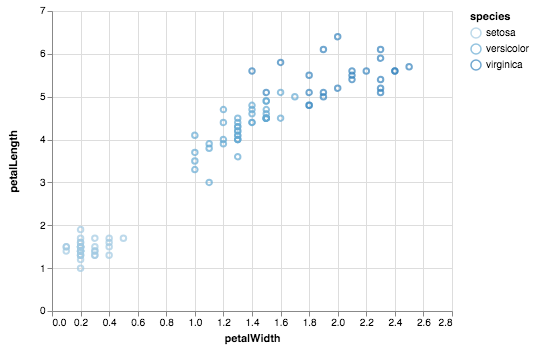

In [16]:
alt.renderers.enable('default')
chart(pandas_expr.execute())

In [17]:
mapd_expr = mapd.table(TABLE_NAME)

# Plotting All the MapD data

## Basic Altair Renderer

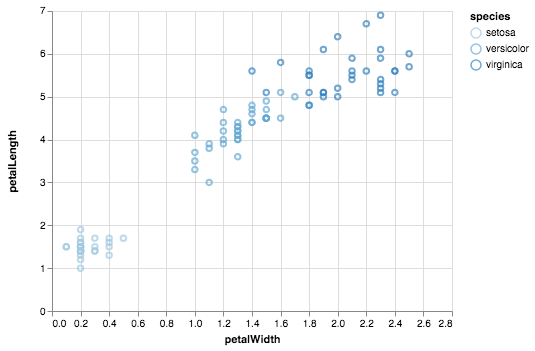

In [18]:
alt.renderers.enable('default')
chart(mapd_expr.limit(100).execute())

## MapD Altair renderer

In [27]:
alt.renderers.enable('mapd', conn=mapd)
chart('SELECT rowid, * \nFROM iris')

In [12]:
with open('simple_scatter_plot.ipynb') as f: nb = __import__('nbformat').read(f, 4)

In [13]:
[
    cell for cell in nb['cells']
    if ''.join(cell['source']).startswith("""alt.renderers.enable('mapd'""")
][0]['outputs'][0]['data']


{'application/vnd.mapd.vega+json': {'connection': {'dbName': 'mapd',
   'host': 'qs-dev.mapd.com',
   'password': 'HyperInteractive',
   'port': '9091',
   'protocol': 'binary',
   'user': 'mapd'},
  'vegalite': {'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json',
   'config': {'view': {'height': 300, 'width': 400}},
   'data': {'name': 'mapd_data'},
   'encoding': {'color': {'field': 'species', 'type': 'ordinal'},
    'x': {'field': 'petalWidth',
     'scale': {'domain': [0, 2.7], 'range': 'width'},
     'type': 'quantitative'},
    'y': {'field': 'petalLength',
     'scale': {'domain': [0, 7], 'range': 'height'},
     'type': 'quantitative'}},
   'mark': 'point'}},
 'text/plain': "Chart({\n  data: 'SELECT *\\nFROM iris',\n  encoding: EncodingWithFacet({\n    color: Color({\n      shorthand: 'species:O'\n    }),\n    x: X({\n      scale: Scale({\n        domain: [0, 2.7],\n        range: 'width'\n      }),\n      shorthand: 'petalWidth:Q'\n    }),\n    y: Y({\n      scal